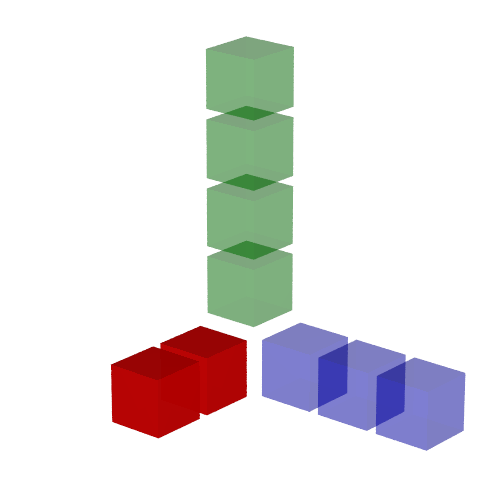

In [1]:
import numpy as np
from PIL import Image

from fdray import Background, Camera, Color, LightSource, Region, Renderer, Scene

x = np.zeros((3, 4, 5), dtype=np.uint8)
x[1:, 0, 0] = 1
x[0, 1:, 0] = 2
x[0, 0, 1:] = 3

region = Region(
    x,
    attrs={
        1: Color("red", 0.9),
        2: Color("blue", 0.4),
        3: Color("green", 0.4),
    },
)

camera = Camera(40, 20, view_scale=3.5, look_at=(0, 0, 1.5))
scene = Scene(
    camera,
    region,
    Background("white", alpha=0.1),
    LightSource(camera.location, "white"),
)
renderer = Renderer(width=500, height=500, antialias=True)
a = renderer.render(scene)
Image.fromarray(a)
